In [1]:
%matplotlib inline

#%% 3-rd party libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [2]:
#%% Defined functions

def missing_data_by_cols(df):
    """
    Returns a pandas data frame with the columns and the percentage of missing data for each column.
    """
    missing = 100 - np.array([df[c].notnull().sum()*100.0 / df.shape[0] for c in df.columns])
    return pd.DataFrame({'Column':df.columns, 'Missing %':missing})

In [3]:
#%% Read the data

df = pd.read_csv('data_bike_rental_day.csv')
df.index = df['dteday']

print df.dtypes
print missing_data_by_cols(df)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
        Column  Missing %
0      instant          0
1       dteday          0
2       season          0
3           yr          0
4         mnth          0
5      holiday          0
6      weekday          0
7   workingday          0
8   weathersit          0
9         temp          0
10       atemp          0
11         hum          0
12   windspeed          0
13      casual          0
14  registered          0
15         cnt          0


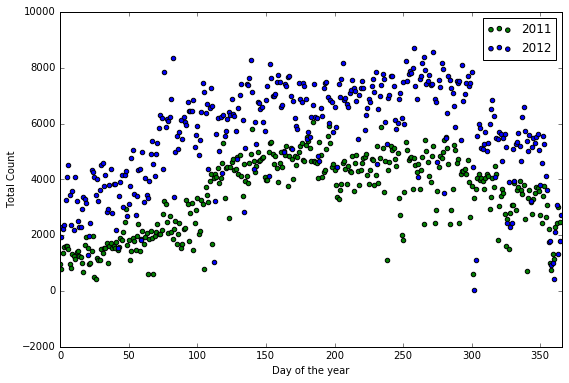

In [4]:
#%% Scatter Plot

df['Day of the year'] = df.groupby('yr').cumcount()
grouped = df.groupby('yr')
year0 = grouped.get_group(0)
year1 = grouped.get_group(1)

fig, ax = plt.subplots(figsize=(9,6))
year0.plot.scatter(x='Day of the year', y='cnt', ax=ax, c='g', label='2011')
year1.plot.scatter(x='Day of the year', y='cnt', ax=ax, c='b', label='2012')
ax.set_xlim(0,366)
ax.set_ylabel('Total Count')

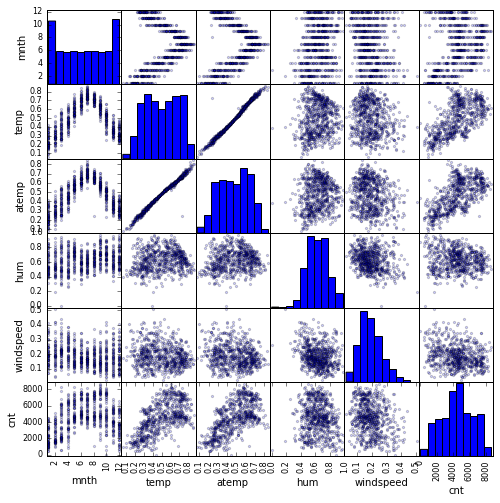

In [6]:
#%% Scatter Matrix

numerical_features = ['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
sm = scatter_matrix(df[numerical_features ], alpha=0.2, figsize=(8,8), diagonal='hist')